# 1 Sentiment Mining

## 1.1 Method 1: Using VADER

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [18]:
# load dataset 1

df1 = pd.read_csv('ted_talks_data_clean.csv')
df1['topic+desc'] = df1[['topics','descriptions']].agg(' '.join, axis=1)   # combine topics and descriptions
df1.head(3)

text1 = list(df1['topic+desc'][:1000])
text1[0]

,speakers,durations,topics,views,descriptions,tags,topic+desc
0,James Veitch,0:09:48,This is what happens when you reply to spam email,63440723,"Suspicious emails: unclaimed insurance bonds, ...",comedy|curiosity|communication|humor|technology,This is what happens when you reply to spam em...
1,Amy Cuddy,0:21:02,Your body language may shape who you are,59281283,(NOTE: Some of the findings presented in this ...,body language|brain|business|psychology|self|s...,Your body language may shape who you are (NOTE...
2,Simon Sinek,0:18:04,How great leaders inspire action,52322192,Simon Sinek has a simple but powerful model fo...,TEDx|business|entrepreneur|leadership|success,How great leaders inspire action Simon Sinek h...


'This is what happens when you reply to spam email Suspicious emails: unclaimed insurance bonds, diamond-encrusted safe deposit boxes, close friends marooned in a foreign country. They pop up in our inboxes, and standard procedure is to delete on sight. But what happens when you reply? Follow along as writer and comedian James Veitch narrates a hilarious, weeks-long exchange with a spammer who offered to cut him in on a hot deal.'

In [19]:
# get compound score of sentiment for the topic & description column

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
compound_scores1 = []

for i in text1:  
    ss = sid.polarity_scores(i)
    compound1 = ss['compound']
    compound_scores1.append(compound1)

<Figure size 864x288 with 0 Axes>

Text(0, 0.5, 'compound score')

Text(0.5, 1.0, 'Distribution of Compound Scores for Topics & Descriptions')

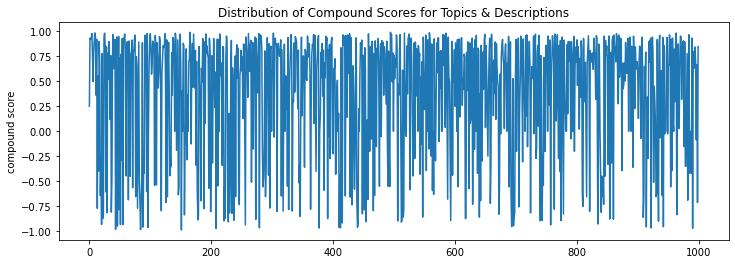

In [20]:
# plot the compound scores

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(compound_scores1)
plt.ylabel('compound score')
plt.title('Distribution of Compound Scores for Topics & Descriptions')
plt.show()

# we can see the upper part (positive) is denser than the lower part (negative)

In [2]:
# load dataset 2, which contains transcript

df2 = pd.read_csv('C:/Users/zhou/Desktop/BIA 660/000--Project/3 - final/transcripts.csv')
df2.head(3)

text2 = df2['transcript'][:1000]
text2[0]

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...


'Good morning. How are you?(Laughter)It\'s been great, hasn\'t it? I\'ve been blown away by the whole thing. In fact, I\'m leaving.(Laughter)There have been three themes running through the conference which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we\'ve had and in all of the people here. Just the variety of it and the range of it. The second is that it\'s put us in a place where we have no idea what\'s going to happen, in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is everybody has an interest in education. Don\'t you? I find this very interesting. If you\'re at a dinner party, and you say you work in education — Actually, you\'re not often at dinner parties, frankly.(Laughter)If you work in education, you\'re not asked.(Laughter)And you\'re never asked back, curiously. That\'s strange to me. But if you are, and you say to somebody, you

In [22]:
# get compound score of sentiment for the transcripts

sid = SentimentIntensityAnalyzer() #initialize
compound_scores2 = []

for i in text2:  
    ss = sid.polarity_scores(i)
    compound2 = ss['compound']
    compound_scores2.append(compound2)

<Figure size 432x144 with 0 Axes>

Text(0, 0.5, 'compound score')

Text(0.5, 1.0, 'Distribution of Compound Scores for Transcripts')

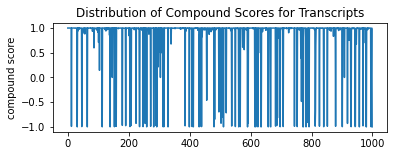

In [23]:
# plot the compound scores

plt.figure(figsize=(6,2))
plt.plot(compound_scores2)
plt.ylabel('compound score')
plt.title('Distribution of Compound Scores for Transcripts')
plt.show()

# we can see the upper part (positive) is denser than the lower part (negative)

## 1.2 Method 2: Using textacy

In [3]:
import textacy.resources
# rs = textacy.resources.ConceptNet()
# rs.download()
# rs.info

rs = textacy.resources.DepecheMood(lang="en", word_rep="lemmapos")
# rs.download()
# rs.info

In [4]:
transcript = list(df2['transcript'])

### 1.2.1 Seperate A Transcript into 10 Sections, Get Emotion Scores for Each Section 

In [18]:
# just try a random transcript in dataset2, here 234 can be changed to any other transcript.
# get emotion scores for all 10 sections.
text3 = transcript[255]

df3 = pd.DataFrame(columns = ['AFRAID', 'AMUSED', 'ANGRY', 'ANNOYED',\
                            'DONT_CARE', 'HAPPY', 'INSPIRED', 'SAD'])               
                  
for i in range(1,11,1):
    content = text3[:len(text3)//10*i]
    doc = textacy.make_spacy_doc(content, lang="en_core_web_sm")
    emo = rs.get_emotional_valence(doc)
    df3 = df3.append(emo, ignore_index=True)


df3

,AFRAID,AMUSED,ANGRY,ANNOYED,DONT_CARE,HAPPY,INSPIRED,SAD
0,0.093471,0.120734,0.116123,0.137358,0.132476,0.102138,0.197180,0.100521
1,0.094291,0.119184,0.115584,0.135792,0.130960,0.102057,0.197168,0.104965
2,0.093002,0.120813,0.117563,0.137710,0.131744,0.103939,0.191808,0.103421
3,0.094249,0.118094,0.117872,0.137403,0.131734,0.102058,0.193715,0.104876
4,0.093891,0.119257,0.117708,0.135688,0.134839,0.101175,0.192925,0.104516
5,0.092922,0.119454,0.118241,0.135263,0.134121,0.102738,0.193426,0.103835
6,0.091965,0.119613,0.116192,0.134484,0.134669,0.103197,0.195538,0.104342
7,0.090327,0.118489,0.115550,0.135151,0.134443,0.104500,0.198086,0.103454
8,0.090402,0.117926,0.116526,0.135697,0.133641,0.104372,0.198307,0.103128
9,0.089612,0.120929,0.116762,0.135839,0.133094,0.103924,0.197060,0.102779


Text(0.5, 0, '10 Sections in the Transcript')

Text(0, 0.5, 'Sentiment Scores for Each Emotion')

Text(0.5, 1.0, 'Sentiment Detection by Sections')

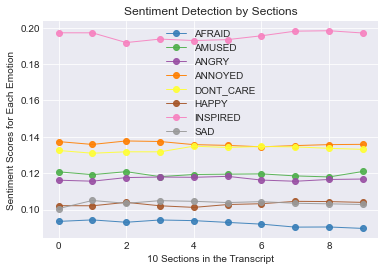

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
num=0
for column in df3:
    num+=1
    plt.plot(df3[column], marker='o', color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.xlabel('10 Sections in the Transcript')     
plt.ylabel('Sentiment Scores for Each Emotion') 
plt.title('Sentiment Detection by Sections')

plt.legend()

### 1.2.2 Get Emotion Scores from A Transcript Sentence by Sentence

In [31]:
import nltk

afraid, amused, angry, annoyed, dont_care, happy, inspired, sad = [],[],[],[],[],[],[],[]

alpha = 0.8       # smoothing factor, for exponential smoothing

# randomly select one transcript, here 111 can be changed to any other transcrip
sentences = nltk.sent_tokenize(transcript[4])

for i in sentences:
    doc = textacy.make_spacy_doc(i, lang="en_core_web_sm")
    emo = rs.get_emotional_valence(doc)
    if emo!={}:
        afraid.append(emo['AFRAID'])
        afraid_smoo = [alpha*i+(1-alpha)*(afraid[afraid.index(i)-1]) for i in afraid]  
        amused.append(emo['AMUSED'])
        amused_smoo = [alpha*i+(1-alpha)*(amused[amused.index(i)-1]) for i in amused]  
        angry.append(emo['ANGRY'])
        angry_smoo = [alpha*i+(1-alpha)*(angry[angry.index(i)-1]) for i in angry]  
        annoyed.append(emo['ANNOYED'])
        annoyed_smoo = [alpha*i+(1-alpha)*(annoyed[annoyed.index(i)-1]) for i in annoyed]  
        dont_care.append(emo['DONT_CARE'])
        dont_care_smoo = [alpha*i+(1-alpha)*(dont_care[dont_care.index(i)-1]) for i in dont_care]  
        happy.append(emo['HAPPY'])
        happy_smoo = [alpha*i+(1-alpha)*(happy[happy.index(i)-1]) for i in happy]  
        inspired.append(emo['INSPIRED'])
        inspired_smoo = [alpha*i+(1-alpha)*(inspired[inspired.index(i)-1]) for i in inspired]  
        sad.append(emo['SAD'])
        sad_smoo = [alpha*i+(1-alpha)*(sad[sad.index(i)-1]) for i in sad]  

Text(0.5, 0, 'Sentences')

Text(0, 0.5, 'Sentiment Scores for Each Emotion')

Text(0.5, 1.0, 'Sentiment Detection by Sentences')

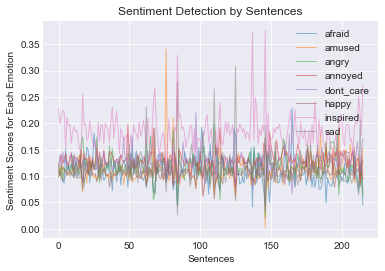

In [32]:
plt.plot(range(len(afraid)), afraid, label = "afraid", lw=1, alpha=0.5) 
plt.plot(range(len(amused)), amused, label = "amused", lw=1, alpha=0.5) 
plt.plot(range(len(angry)), angry, label = "angry", lw=1, alpha=0.5) 
plt.plot(range(len(annoyed)), annoyed, label = "annoyed", lw=1, alpha=0.5) 
plt.plot(range(len(dont_care)), dont_care, label = "dont_care", lw=1, alpha=0.5) 
plt.plot(range(len(happy)), happy, label = "happy", lw=1, alpha=0.5) 
plt.plot(range(len(inspired)), inspired, label = "inspired", lw=1, alpha=0.5) 
plt.plot(range(len(sad)), sad, label = "sad", lw=1, alpha=0.5) 
  

plt.xlabel('Sentences') 
plt.ylabel('Sentiment Scores for Each Emotion') 
plt.title('Sentiment Detection by Sentences') 
  
plt.legend() 
plt.show() 